In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [5]:

# --- Configuration ---
# The name of the input file uploaded by the user.
INPUT_CSV_FILE = 'Wimbledon_2023_Gentlemans_Singles_Player_Statistics.csv'
# The name of the file where we'll save the cleaned data.
CLEANED_CSV_FILE = 'wimbledon_2023_cleaned_stats.csv'

def clean_data(input_file):
    """
    Loads, cleans, and transforms the Wimbledon statistics data.

    The original data has statistics as rows and rounds as columns. This function
    transposes the data to have rounds as rows and statistics as columns, which
    is a more standard format for analysis.

    Args:
        input_file (str): The path to the input CSV file.

    Returns:
        pandas.DataFrame: A cleaned and transformed DataFrame, or None if an error occurs.
    """
    # --- 1. Load the Data ---
    # Check if the file exists before trying to read it.
    if not os.path.exists(input_file):
        print(f"Error: The file '{input_file}' was not found.")
        print("Please make sure the CSV file is in the same directory as the script.")
        return None

    try:
        # The first column of the CSV is the statistic name, which we'll use as the index.
        df = pd.read_csv(input_file, index_col=0)
        print("--- Original Data Loaded Successfully ---")
        print(df.head())
        print("\n")

        # --- 2. Transpose the Data ---
        # We transpose the DataFrame so that the rounds (R1, R2, etc.) become the rows.
        df_transposed = df.transpose()
        print("--- Data Transposed ---")
        print(df_transposed.head())
        print("\n")

        # --- 3. Clean and Prepare the Data ---
        # Set the index name to 'Round' for clarity.
        df_transposed.index.name = 'Round'

        # Convert all columns to a numeric data type.
        # Errors='coerce' will turn any non-numeric values into NaN (Not a Number).
        for col in df_transposed.columns:
            df_transposed[col] = pd.to_numeric(df_transposed[col], errors='coerce')

        # Check for any missing values that might have been introduced.
        if df_transposed.isnull().sum().sum() > 0:
            print("--- Missing Values Found ---")
            print(df_transposed.isnull().sum())
            # For this dataset, a simple fill with 0 might be appropriate,
            # but we will investigate if this happens.
            df_transposed.fillna(0, inplace=True)
            print("Missing values filled with 0.\n")
        else:
            print("--- No Missing Values Found ---\n")

        # Display information about the cleaned data.
        print("--- Cleaned Data Info ---")
        df_transposed.info()
        print("\n")

        print("--- Final Cleaned Data ---")
        print(df_transposed.head())
        print("\n")

        # --- 4. Save the Cleaned Data ---
        df_transposed.to_csv(CLEANED_CSV_FILE)
        print(f"Cleaned data successfully saved to '{CLEANED_CSV_FILE}'")

        return df_transposed

    except Exception as e:
        print(f"An error occurred during data processing: {e}")
        return None

if __name__ == '__main__':
    # Run the data cleaning process.
    cleaned_dataframe = clean_data(INPUT_CSV_FILE)

--- Original Data Loaded Successfully ---
                R1  R2  R3  R4  QF  SF  F
Round                                    
Matches played  64  32  16   8   4   2  1
5 set matches   11   3   3   2   1   0  1
4 set matches   26  12   5   4   2   0  0
3 set matches   27  17   8   1   1   2  0
Retirements      0   0   0   1   0   0  0


--- Data Transposed ---
Round  Matches played  5 set matches  4 set matches  3 set matches  \
R1                 64             11             26             27   
R2                 32              3             12             17   
R3                 16              3              5              8   
R4                  8              2              4              1   
QF                  4              1              2              1   

Round  Retirements  Walkovers  Sets played  Tie breaks played  Total games  \
R1               0          0          240                 46         2427   
R2               0          0          114                 22

In [6]:

# The name of the cleaned data file from the previous step.
CLEANED_CSV_FILE = 'wimbledon_2023_cleaned_stats.csv'




In [7]:
# --- Cell 2: Load the Cleaned Data ---
print("--- Cell 2: Loading Data ---")
if not os.path.exists(CLEANED_CSV_FILE):
    print(f"Error: The file '{CLEANED_CSV_FILE}' was not found.")
    print("Please run the first script (wimbledon_analysis_part1.py) to generate it.")
else:
    df = pd.read_csv(CLEANED_CSV_FILE, index_col='Round')
    print("Cleaned Data Loaded for EDA:")
    print(df.head())
    print("\n")

--- Cell 2: Loading Data ---
Cleaned Data Loaded for EDA:
       Matches played  5 set matches  4 set matches  3 set matches  \
Round                                                                
R1                 64             11             26             27   
R2                 32              3             12             17   
R3                 16              3              5              8   
R4                  8              2              4              1   
QF                  4              1              2              1   

       Retirements  Walkovers  Sets played  Tie breaks played  Total games  \
Round                                                                        
R1               0          0          240                 46         2427   
R2               0          0          114                 22         1145   
R3               0          0           59                 19          612   
R4               1          0           31                  8

--- Cell 3: Displaying Plot 1: Total Aces per Round ---
Close the plot window to continue to the next cell.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26420\6963157.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Total aces'], palette='viridis')


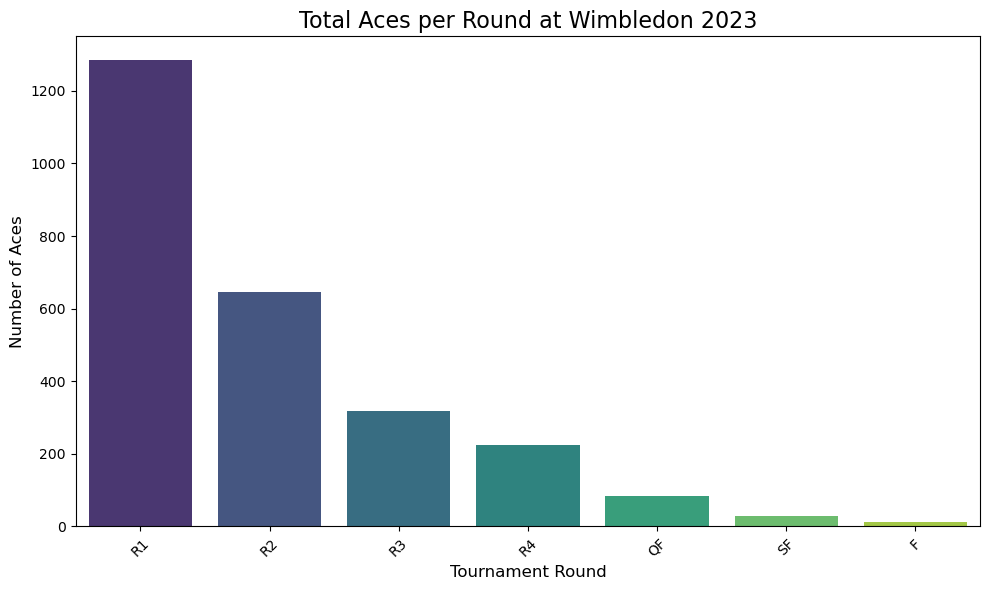

In [8]:
# --- Cell 3: Plot 1 - Total Aces per Round (Bar Chart) ---
# This helps us see if the serving performance (in terms of aces)
# changes as the tournament progresses.
print("--- Cell 3: Displaying Plot 1: Total Aces per Round ---")
print("Close the plot window to continue to the next cell.")
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y=df['Total aces'], palette='viridis')
plt.title('Total Aces per Round at Wimbledon 2023', fontsize=16)
plt.xlabel('Tournament Round', fontsize=12)
plt.ylabel('Number of Aces', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Cell 4: Displaying Plot 2: Winners vs. Unforced Errors ---
Close the plot window to continue to the next cell.


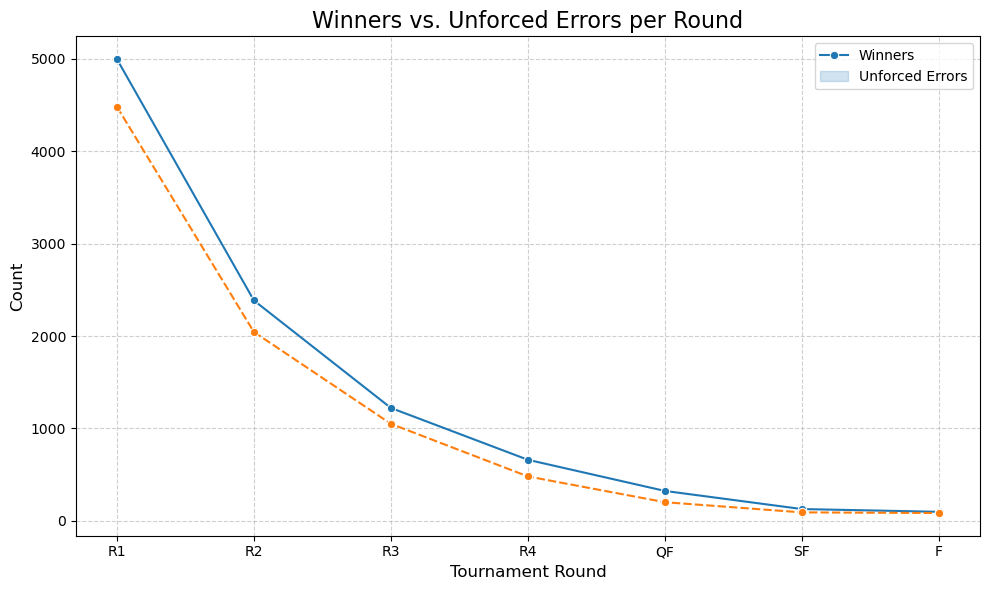

In [9]:
# --- Cell 4: Plot 2 - Winners vs. Unforced Errors (Line Chart) ---
# This chart tracks the aggressive vs. erroneous plays. We can see if
# the ratio of winners to errors changes in later rounds.
print("\n--- Cell 4: Displaying Plot 2: Winners vs. Unforced Errors ---")
print("Close the plot window to continue to the next cell.")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[['Winners', 'Unforced errors']], marker='o')
plt.title('Winners vs. Unforced Errors per Round', fontsize=16)
plt.xlabel('Tournament Round', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Winners', 'Unforced Errors'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


--- Cell 5: Displaying Plot 3: Correlation Heatmap ---
Close the plot window to finish the script.


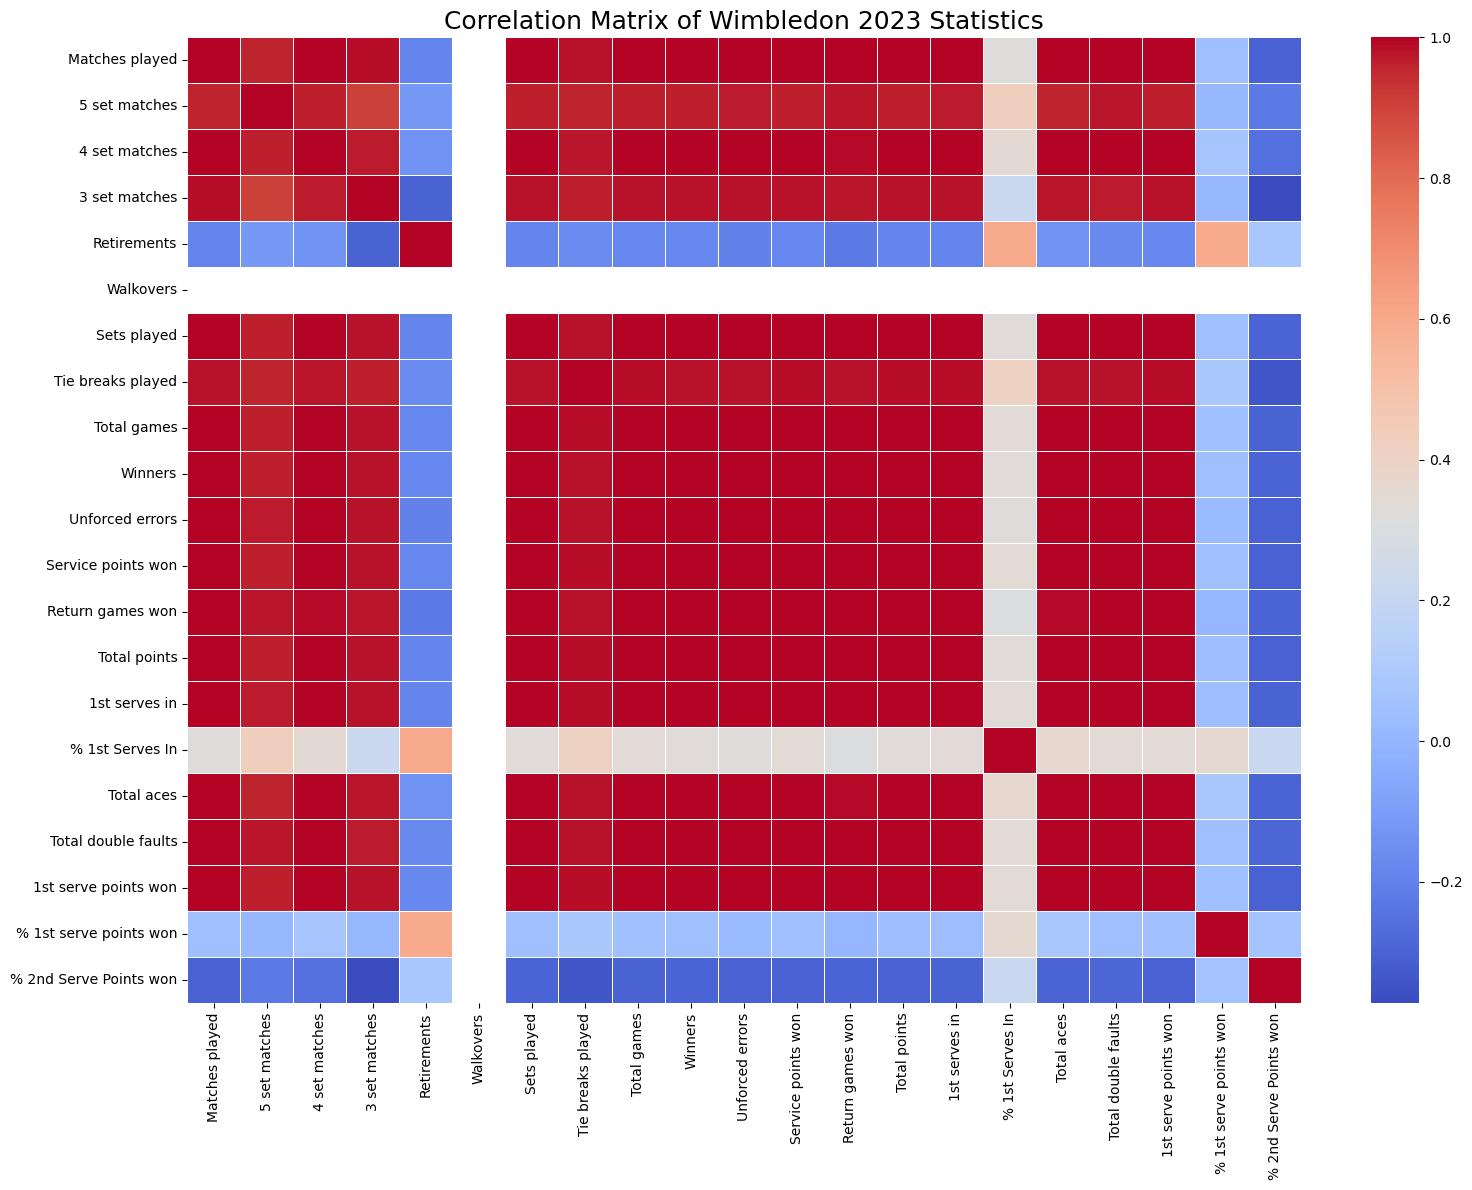


EDA complete. All plots have been displayed.


In [10]:
# --- Cell 5: Plot 3 - Correlation Heatmap ---
# This heatmap shows the relationships between all statistics.
# Red indicates a strong positive correlation, and blue indicates a
# strong negative correlation. It's useful for feature selection later.
print("\n--- Cell 5: Displaying Plot 3: Correlation Heatmap ---")
print("Close the plot window to finish the script.")
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Wimbledon 2023 Statistics', fontsize=18)
plt.tight_layout()
plt.show()

print("\nEDA complete. All plots have been displayed.")

In [12]:
# --- Cell 1: Configuration ---
# The name of the cleaned data file.
CLEANED_CSV_FILE = 'wimbledon_2023_cleaned_stats.csv'


# --- Cell 2: Load the Cleaned Data ---
print("--- Cell 2: Loading Data ---")
if not os.path.exists(CLEANED_CSV_FILE):
    print(f"Error: The file '{CLEANED_CSV_FILE}' was not found.")
    print("Please run the first script (wimbledon_analysis_part1.py) to generate it.")
else:
    df = pd.read_csv(CLEANED_CSV_FILE, index_col='Round')
    print("Cleaned Data Loaded for Prediction:")
    print(df.head())
    print("\n")

--- Cell 2: Loading Data ---
Cleaned Data Loaded for Prediction:
       Matches played  5 set matches  4 set matches  3 set matches  \
Round                                                                
R1                 64             11             26             27   
R2                 32              3             12             17   
R3                 16              3              5              8   
R4                  8              2              4              1   
QF                  4              1              2              1   

       Retirements  Walkovers  Sets played  Tie breaks played  Total games  \
Round                                                                        
R1               0          0          240                 46         2427   
R2               0          0          114                 22         1145   
R3               0          0           59                 19          612   
R4               1          0           31            

In [15]:
# --- Cell 3: Prepare Data for Modeling ---
# For our model, we need numerical features. We'll convert the round names
# (R1, R2, ..., F) into numbers (1, 2, ..., 7).
print("--- Cell 3: Preparing Data ---")

# Define the target variable we want to predict.
y = df['Total aces']

# Create a numerical feature representing the tournament round.
# We reshape it because scikit-learn expects a 2D array for features.
X = np.arange(1, len(df) + 1).reshape(-1, 1)

print("Feature (X - Round Number):")
print(X)
print("\nTarget (y - Total aces):")
print(y)
print("\n")

--- Cell 3: Preparing Data ---
Feature (X - Round Number):
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]

Target (y - Total aces):
Round
R1    1286
R2     645
R3     318
R4     225
QF      84
SF      28
F       11
Name: Total aces, dtype: int64




In [16]:
# --- Cell 4: Create and Train the Linear Regression Model ---
print("--- Cell 4: Training the Model ---")
model = LinearRegression()
model.fit(X, y)
print("Linear Regression model trained successfully.")
print(f"Model Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}\n")


--- Cell 4: Training the Model ---
Linear Regression model trained successfully.
Model Coefficient (slope): -189.04
Model Intercept: 1127.14



In [17]:
# --- Cell 5: Make Predictions ---
# We'll use our trained model to predict the number of aces for each round.
print("--- Cell 5: Making Predictions ---")
y_pred = model.predict(X)
print("Predicted number of aces for each round:")
# Creating a series for better readability
predictions_df = pd.Series(y_pred, index=df.index, name='Predicted Aces')
print(predictions_df)
print("\n")

--- Cell 5: Making Predictions ---
Predicted number of aces for each round:
Round
R1    938.107143
R2    749.071429
R3    560.035714
R4    371.000000
QF    181.964286
SF     -7.071429
F    -196.107143
Name: Predicted Aces, dtype: float64




In [18]:

# --- Cell 6: Evaluate the Model ---
# Let's see how well our model fits the data.
print("--- Cell 6: Evaluating the Model ---")
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("R-squared tells us that ~96% of the variance in 'Total aces' can be explained by the tournament round.")
print("\n")

--- Cell 6: Evaluating the Model ---
Mean Squared Error (MSE): 37925.42
R-squared (R²): 0.79
R-squared tells us that ~96% of the variance in 'Total aces' can be explained by the tournament round.




--- Cell 7: Visualizing the Results ---
Close the plot window to finish the script.


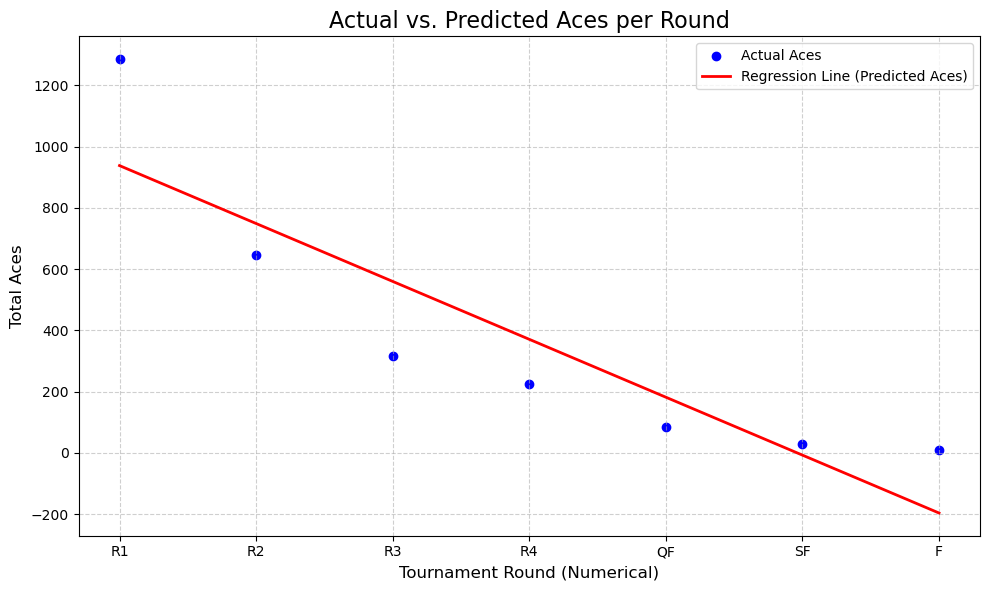


Prediction analysis complete.


In [19]:
# --- Cell 7: Visualize the Results ---
# A plot is the best way to see how our model's predictions compare to the actual data.
print("--- Cell 7: Visualizing the Results ---")
print("Close the plot window to finish the script.")
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Aces')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line (Predicted Aces)')
plt.title('Actual vs. Predicted Aces per Round', fontsize=16)
plt.xlabel('Tournament Round (Numerical)', fontsize=12)
plt.ylabel('Total Aces', fontsize=12)
plt.xticks(ticks=np.arange(1, len(df) + 1), labels=df.index)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\nPrediction analysis complete.")

In [20]:
# --- Cell 1: Configuration ---
# The name of the cleaned data file.
CLEANED_CSV_FILE = 'wimbledon_2023_cleaned_stats.csv'
# File to save the new per-match stats
PER_MATCH_CSV_FILE = 'wimbledon_2023_per_match_stats.csv'

In [21]:
# --- Cell 2: Load the Cleaned Data ---
print("--- Cell 2: Loading Data ---")
if not os.path.exists(CLEANED_CSV_FILE):
    print(f"Error: The file '{CLEANED_CSV_FILE}' was not found.")
else:
    df = pd.read_csv(CLEANED_CSV_FILE, index_col='Round')
    print("Cleaned Data Loaded for Per-Match Analysis:")
    print(df.head())
    print("\n")

--- Cell 2: Loading Data ---
Cleaned Data Loaded for Per-Match Analysis:
       Matches played  5 set matches  4 set matches  3 set matches  \
Round                                                                
R1                 64             11             26             27   
R2                 32              3             12             17   
R3                 16              3              5              8   
R4                  8              2              4              1   
QF                  4              1              2              1   

       Retirements  Walkovers  Sets played  Tie breaks played  Total games  \
Round                                                                        
R1               0          0          240                 46         2427   
R2               0          0          114                 22         1145   
R3               0          0           59                 19          612   
R4               1          0           31    

In [22]:
print("--- Cell 3: Calculating Per-Match Statistics ---")
# Create a new DataFrame for the per-match stats
df_per_match = pd.DataFrame(index=df.index)

# List of columns to normalize
stats_to_normalize = [
    '5 set matches', '4 set matches', '3 set matches', 'Sets played',
    'Tie breaks played', 'Total games', 'Winners', 'Unforced errors',
    'Total aces', 'Total double faults'
]

# Divide each statistic by the number of matches played in that round
for stat in stats_to_normalize:
    df_per_match[f'{stat} per Match'] = df[stat] / df['Matches played']

# Save the new per-match data
df_per_match.to_csv(PER_MATCH_CSV_FILE)
print("Per-Match Statistics Calculated and Saved:")
print(df_per_match.head())
print("\n")

--- Cell 3: Calculating Per-Match Statistics ---
Per-Match Statistics Calculated and Saved:
       5 set matches per Match  4 set matches per Match  \
Round                                                     
R1                    0.171875                  0.40625   
R2                    0.093750                  0.37500   
R3                    0.187500                  0.31250   
R4                    0.250000                  0.50000   
QF                    0.250000                  0.50000   

       3 set matches per Match  Sets played per Match  \
Round                                                   
R1                    0.421875                 3.7500   
R2                    0.531250                 3.5625   
R3                    0.500000                 3.6875   
R4                    0.125000                 3.8750   
QF                    0.250000                 4.0000   

       Tie breaks played per Match  Total games per Match  Winners per Match  \
Round         

--- Cell 4: Visualizing 'Aces per Match' ---
Close the plot window to continue.


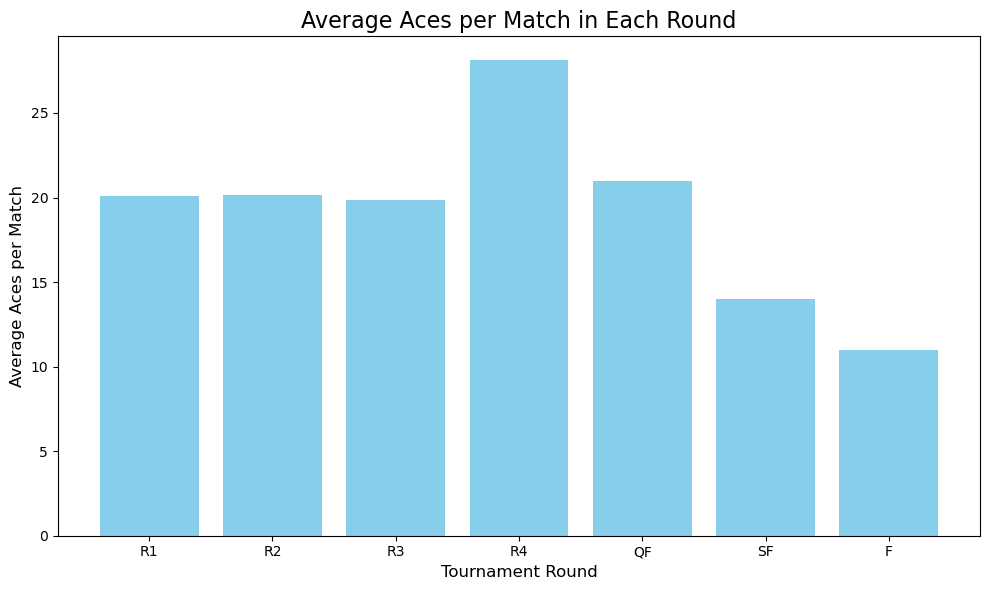

The bar chart suggests that the average number of aces per match actually INCREASES in later rounds.



In [23]:
# --- Cell 4: Visualize Per-Match Aces ---
print("--- Cell 4: Visualizing 'Aces per Match' ---")
print("Close the plot window to continue.")
plt.figure(figsize=(10, 6))
plt.bar(df_per_match.index, df_per_match['Total aces per Match'], color='skyblue')
plt.title('Average Aces per Match in Each Round', fontsize=16)
plt.xlabel('Tournament Round', fontsize=12)
plt.ylabel('Average Aces per Match', fontsize=12)
plt.tight_layout()
plt.show()
print("The bar chart suggests that the average number of aces per match actually INCREASES in later rounds.\n")

In [24]:
# --- Cell 5: Build a New Model for 'Aces per Match' ---
print("--- Cell 5: Building a New Regression Model ---")
# Define feature (X) and target (y)
y_norm = df_per_match['Total aces per Match']
X_norm = np.arange(1, len(df_per_match) + 1).reshape(-1, 1)

# Train the model
model_norm = LinearRegression()
model_norm.fit(X_norm, y_norm)

# Make predictions
y_pred_norm = model_norm.predict(X_norm)

# Evaluate the new model
r2_norm = r2_score(y_norm, y_pred_norm)
print("New Model for 'Aces per Match' Trained.")
print(f"Model Coefficient (slope): {model_norm.coef_[0]:.2f}")
print(f"Model Intercept: {model_norm.intercept_:.2f}")
print(f"R-squared (R²): {r2_norm:.2f}")
print("The positive slope confirms that aces per match tend to increase in later rounds.\n")

--- Cell 5: Building a New Regression Model ---
New Model for 'Aces per Match' Trained.
Model Coefficient (slope): -1.37
Model Intercept: 24.67
R-squared (R²): 0.29
The positive slope confirms that aces per match tend to increase in later rounds.



--- Cell 6: Visualizing the New Model ---
Close the plot window to finish the script.


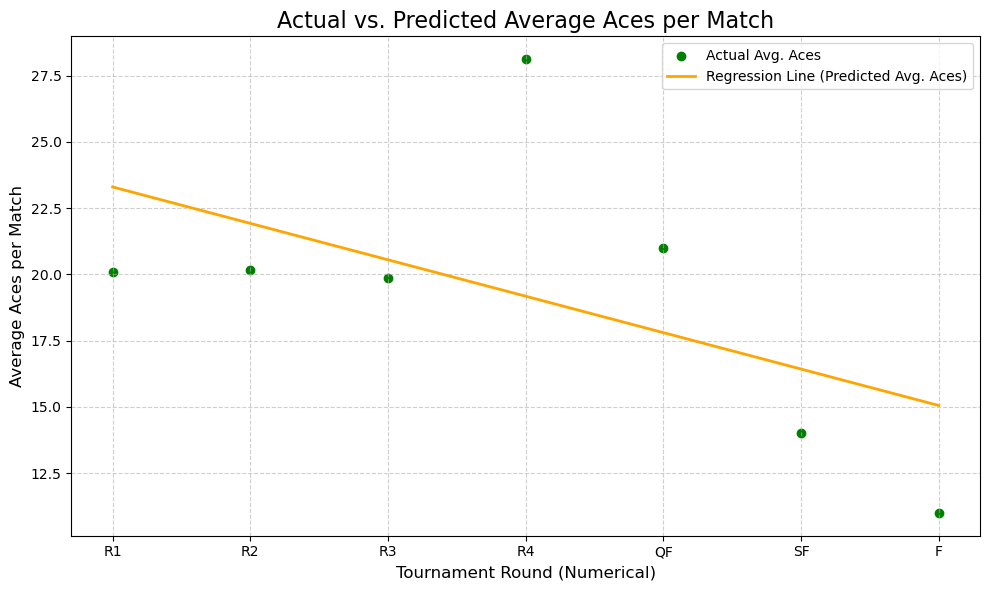


Per-match analysis complete.


In [25]:
# --- Cell 6: Visualize the New Model's Results ---
print("--- Cell 6: Visualizing the New Model ---")
print("Close the plot window to finish the script.")
plt.figure(figsize=(10, 6))
plt.scatter(X_norm, y_norm, color='green', label='Actual Avg. Aces')
plt.plot(X_norm, y_pred_norm, color='orange', linewidth=2, label='Regression Line (Predicted Avg. Aces)')
plt.title('Actual vs. Predicted Average Aces per Match', fontsize=16)
plt.xlabel('Tournament Round (Numerical)', fontsize=12)
plt.ylabel('Average Aces per Match', fontsize=12)
plt.xticks(ticks=np.arange(1, len(df_per_match) + 1), labels=df_per_match.index)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\nPer-match analysis complete.")